In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from extract import extract
from transform import transform
from load import load

extract()
transform()
load()

In [69]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from config import TARGET_PATH
from config import FOLDER_NAME
from load import OWID_FILE_NAME

OWID_COLUMNS = [
    'iso_code', 'continent', 'location', 'date',
    
    'total_cases', 'total_cases_normalized',
    'total_deaths', 'total_deaths_normalized', 
    
    'new_cases', 'new_cases_smoothed', 'new_cases_smoothed_normalized',
    'new_deaths', 'new_deaths_smoothed', 'new_deaths_smoothed_normalized',
    
    'people_vaccinated', 'people_vaccinated_interpolated', 'people_vaccinated_interpolated_normalized', 
    'people_fully_vaccinated', 'people_fully_vaccinated_interpolated', 'people_fully_vaccinated_interpolated_normalized'
]

file_path = os.path.join(TARGET_PATH, FOLDER_NAME, OWID_FILE_NAME)
df = pd.read_csv(file_path)
df = df[OWID_COLUMNS].fillna(0)
df = df[df['date'] > '2021-01-01']

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 312 to 630
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   iso_code                                         319 non-null    object 
 1   continent                                        319 non-null    object 
 2   location                                         319 non-null    object 
 3   date                                             319 non-null    object 
 4   total_cases                                      319 non-null    float64
 5   total_cases_normalized                           319 non-null    float64
 6   total_deaths                                     319 non-null    float64
 7   total_deaths_normalized                          319 non-null    float64
 8   new_cases                                        319 non-null    float64
 9   new_cases_smoothed            

<AxesSubplot:title={'center':'Normalized People Vaccinated (1 dose) and People Fully Vaccinated (2 doses)'}>

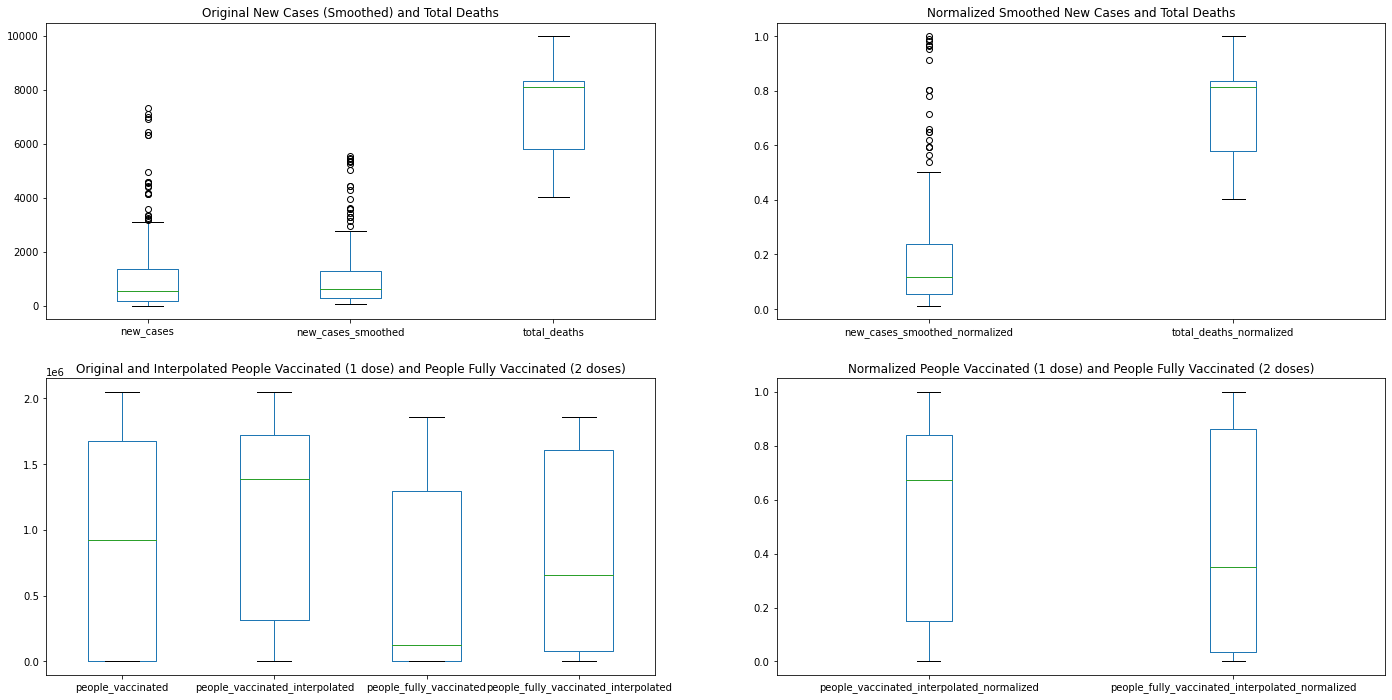

In [71]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))

ax[0, 0].set_title('Original New Cases (Smoothed) and Total Deaths')
ax[0, 1].set_title('Normalized Smoothed New Cases and Total Deaths')
ax[1, 0].set_title('Original and Interpolated People Vaccinated (1 dose) and People Fully Vaccinated (2 doses)')
ax[1, 1].set_title('Normalized People Vaccinated (1 dose) and People Fully Vaccinated (2 doses)')

df[[
    'new_cases',
    'new_cases_smoothed',
    'total_deaths'
]].plot(kind='box', ax=ax[0, 0])

df[[
    'new_cases_smoothed_normalized',
    'total_deaths_normalized'
]].plot(kind='box', ax=ax[0, 1])

df[[
    'people_vaccinated', 
    'people_vaccinated_interpolated', 
    'people_fully_vaccinated',
    'people_fully_vaccinated_interpolated'
]].plot(kind='box', ax=ax[1, 0])

df[[
    'people_vaccinated_interpolated_normalized', 
    'people_fully_vaccinated_interpolated_normalized'
]].plot(kind='box', ax=ax[1, 1])

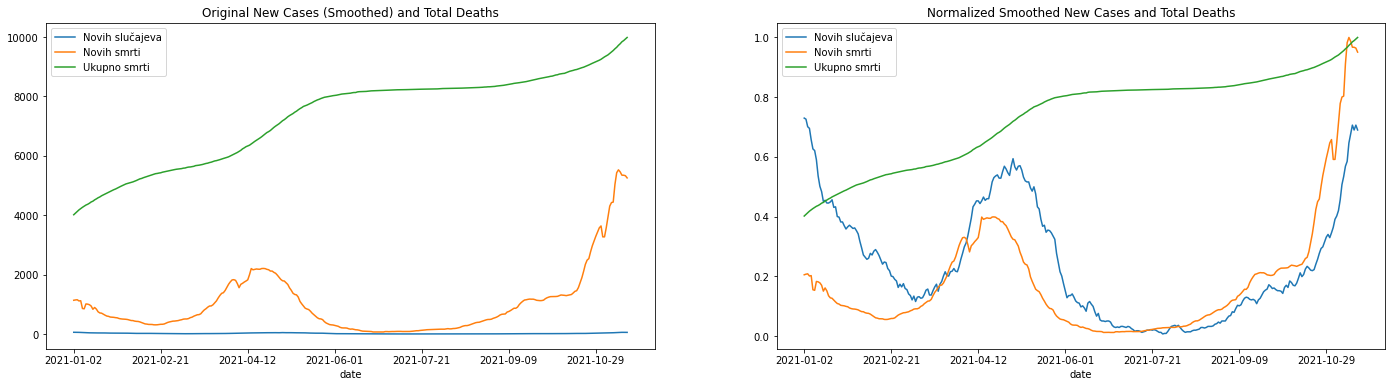

In [72]:
fig, ax = plt.subplots(ncols=2, figsize=(24, 6))

ax[0].set_title('Original New Cases (Smoothed) and Total Deaths')
ax[1].set_title('Normalized Smoothed New Cases and Total Deaths')

df[[
    'date',
    'new_deaths_smoothed', 
    'new_cases_smoothed', 
    'total_deaths'
]].plot(x='date', kind='line', ax=ax[0])

df[[
    'date',
    'new_deaths_smoothed_normalized', 
    'new_cases_smoothed_normalized', 
    'total_deaths_normalized'
]].plot(x='date', kind='line', ax=ax[1])

ax[0].legend(["Novih slučajeva", "Novih smrti", "Ukupno smrti"])
ax[1].legend(["Novih slučajeva", "Novih smrti", "Ukupno smrti"])

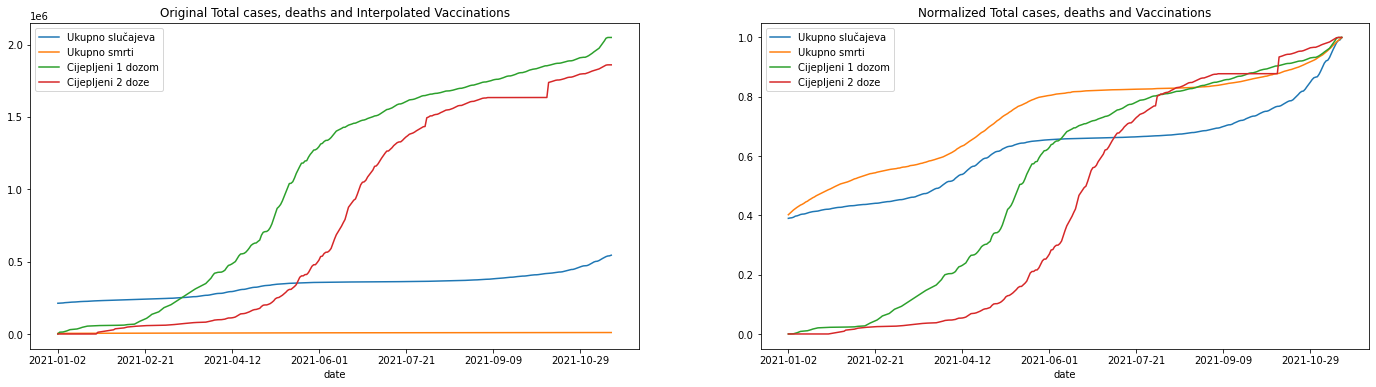

In [73]:
fig, ax = plt.subplots(ncols=2, figsize=(24, 6))

ax[0].set_title('Original Total cases, deaths and Interpolated Vaccinations')
ax[1].set_title('Normalized Total cases, deaths and Vaccinations')

df[[
    'date',
    'total_cases', 
    'total_deaths',
    'people_vaccinated_interpolated', 
    'people_fully_vaccinated_interpolated'
]].plot(x='date', kind='line', ax=ax[0])

df[[
    'date',
    'total_cases_normalized', 
    'total_deaths_normalized',
    'people_vaccinated_interpolated_normalized', 
    'people_fully_vaccinated_interpolated_normalized'
]].plot(x='date', kind='line', ax=ax[1])

ax[0].legend(["Ukupno slučajeva", "Ukupno smrti", "Cijepljeni 1 dozom", "Cijepljeni 2 doze"])
ax[1].legend(["Ukupno slučajeva", "Ukupno smrti", "Cijepljeni 1 dozom", "Cijepljeni 2 doze"])

<AxesSubplot:>

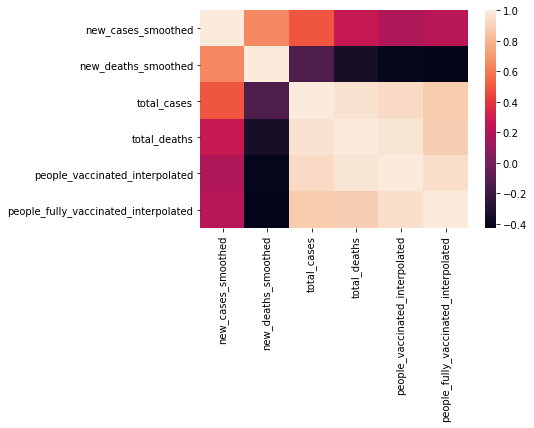

In [74]:
import seaborn as sns

corr_df = df[[
    'new_cases_smoothed', 
    'new_deaths_smoothed',
    'total_cases', 
    'total_deaths', 
    'people_vaccinated_interpolated', 
    'people_fully_vaccinated_interpolated'
]].corr()
sns.heatmap(corr_df)

<AxesSubplot:>

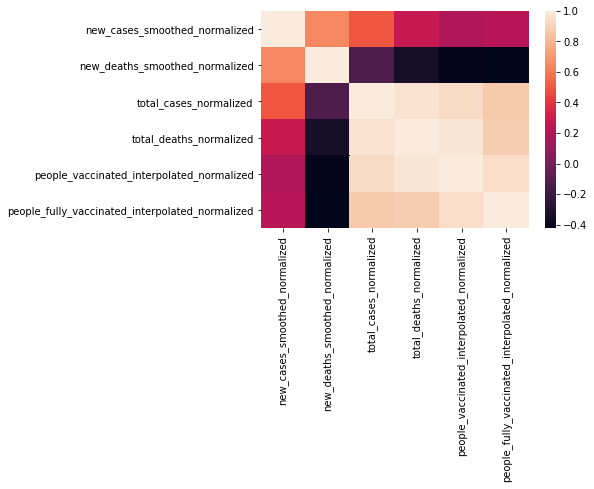

In [177]:
import seaborn as sns

corr_df = df[[
    'new_cases_smoothed_normalized', 
    'new_deaths_smoothed_normalized',
    'total_cases_normalized', 
    'total_deaths_normalized', 
    'people_vaccinated_interpolated_normalized', 
    'people_fully_vaccinated_interpolated_normalized'
]].corr()
sns.heatmap(corr_df)

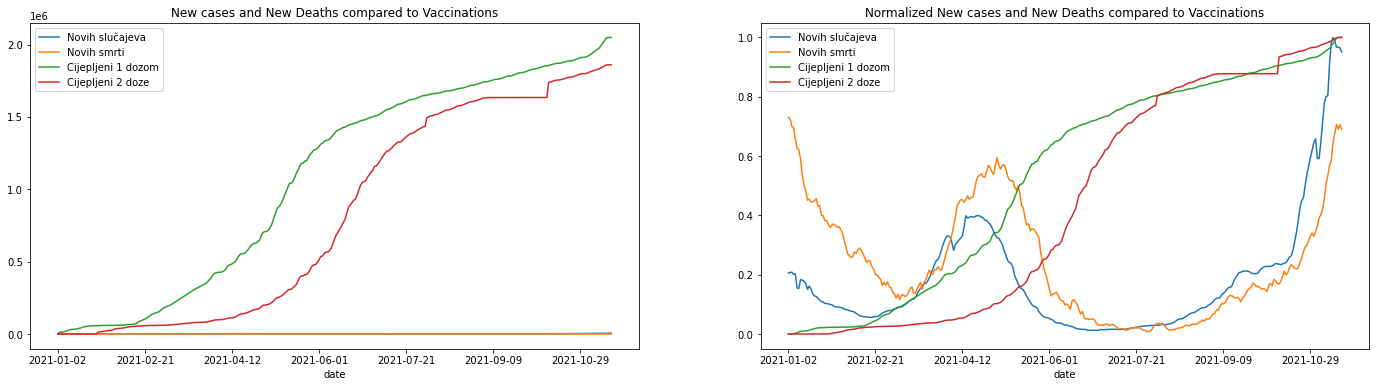

In [77]:
fig, ax = plt.subplots(ncols=2, figsize=(24, 6))

ax[0].set_title('New cases and New Deaths compared to Vaccinations')
ax[1].set_title('Normalized New cases and New Deaths compared to Vaccinations')

df[[
    'date',
    'new_cases_smoothed', 
    'new_deaths_smoothed', 
    'people_vaccinated_interpolated',
    'people_fully_vaccinated_interpolated'
]].plot(x='date', kind='line', ax=ax[0])
ax[0].legend(["Novih slučajeva", "Novih smrti", "Cijepljeni 1 dozom", "Cijepljeni 2 doze"])

df[[
    'date',
    'new_cases_smoothed_normalized', 
    'new_deaths_smoothed_normalized', 
    'people_vaccinated_interpolated_normalized',
    'people_fully_vaccinated_interpolated_normalized'
]].plot(x='date', kind='line', ax=ax[1])
ax[1].legend(["Novih slučajeva", "Novih smrti", "Cijepljeni 1 dozom", "Cijepljeni 2 doze"])

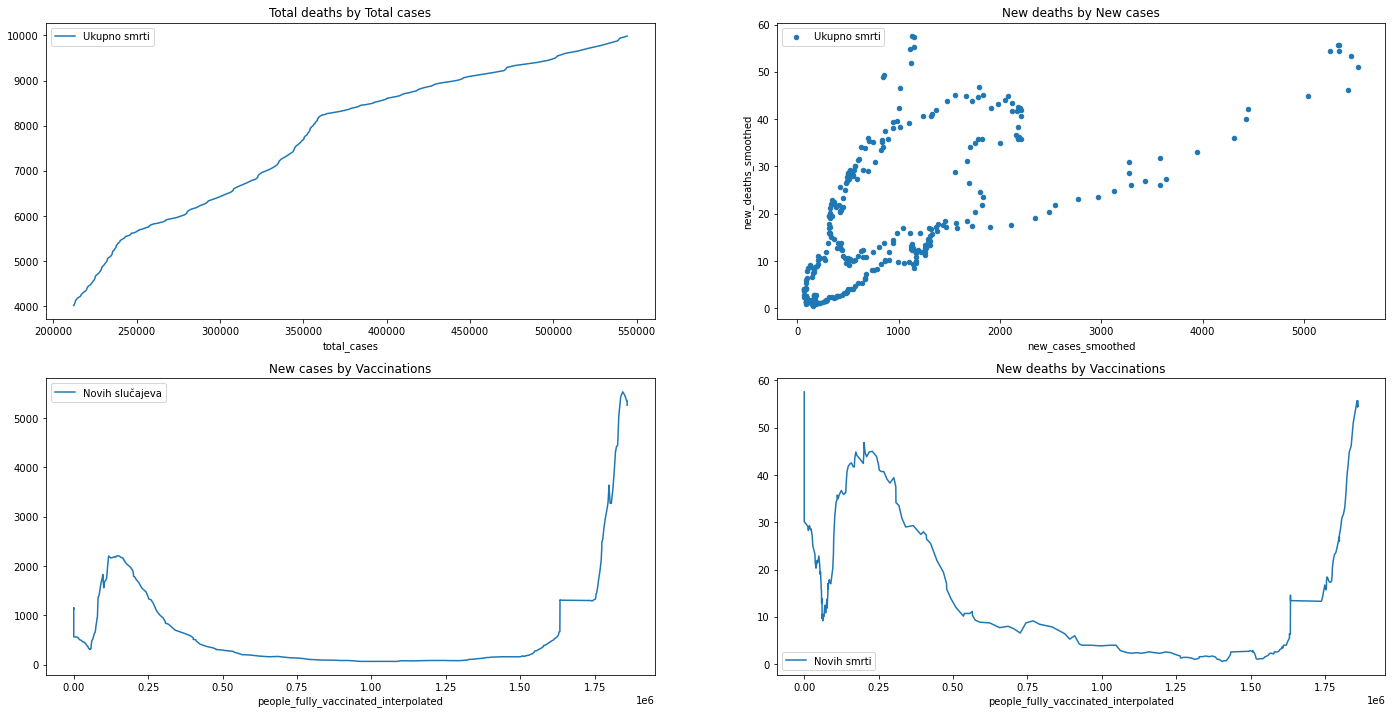

In [86]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))

ax[0, 0].set_title('Total deaths by Total cases')
ax[0, 1].set_title('New deaths by New cases')
ax[1, 0].set_title('New cases by Vaccinations')
ax[1, 1].set_title('New deaths by Vaccinations')

df[[
    'total_cases', 
    'total_deaths'
]].plot(x='total_cases', kind='line', ax=ax[0, 0])
ax[0, 0].legend(["Ukupno smrti"])

df[[
    'new_cases_smoothed', 
    'new_deaths_smoothed'
]].plot(x='new_cases_smoothed', y='new_deaths_smoothed', kind='scatter', ax=ax[0, 1])
ax[0, 1].legend(["Ukupno smrti"])

df[[
    'people_fully_vaccinated_interpolated',
    'new_cases_smoothed'
]].plot(x='people_fully_vaccinated_interpolated', kind='line', ax=ax[1, 0])
ax[1, 0].legend(["Novih slučajeva"])

df[[
    'people_fully_vaccinated_interpolated',
    'new_deaths_smoothed'
]].plot(x='people_fully_vaccinated_interpolated', kind='line', ax=ax[1, 1])
ax[1, 1].legend(["Novih smrti"])

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

X_name = 'total_cases'
y_name = 'total_deaths'

X = df[X_name]
X = X.values.reshape(-1, 1)
y = df[y_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr = LinearRegression()
#lr = Ridge()
#lr = Lasso(alpha=1)
lr.fit(X_train, y_train)

train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
mae = mean_absolute_error(y_test, lr.predict(X_test))
mse = mean_squared_error(y_test, lr.predict(X_test))

print("Training score: {}".format(round(train_score, 2)))
print("Testing score: {}".format(round(test_score, 2)))
print("Mean Absolute Error: {}".format(round(mae, 2)))
print("Mean Squared Error: {}".format(round(mse, 2)))

Training score: 0.93
Testing score: 0.93
Mean Absolute Error: 309.28
Mean Squared Error: 169804.1


In [175]:
diffs = df[X_name].diff()
avg_vacc_per_week = diffs.tail(7).mean()
X_predict = np.array([df[X_name].max() + (vacc * (i+1)) for i, vacc in enumerate([avg_vacc_per_week] * 100)])

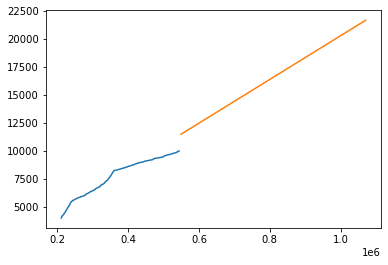

In [176]:
plt.plot(df[X_name], df[y_name])
plt.plot(X_predict, lr.predict(X_predict.reshape(-1, 1)))

In [119]:
from sklearn.svm import SVR

X = df['total_cases']
X = X.values.reshape(-1, 1)
y = df['total_deaths']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

svr = SVR(kernel='poly')
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.5704177281507505